# Execute the code below

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather["DATE"] = pd.to_datetime(df_weather["DATE"])

# You have now a DataFrame with lots of weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

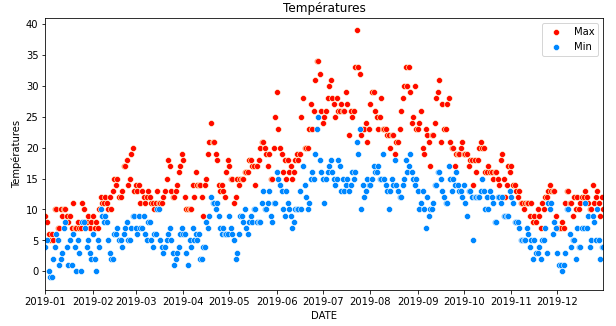


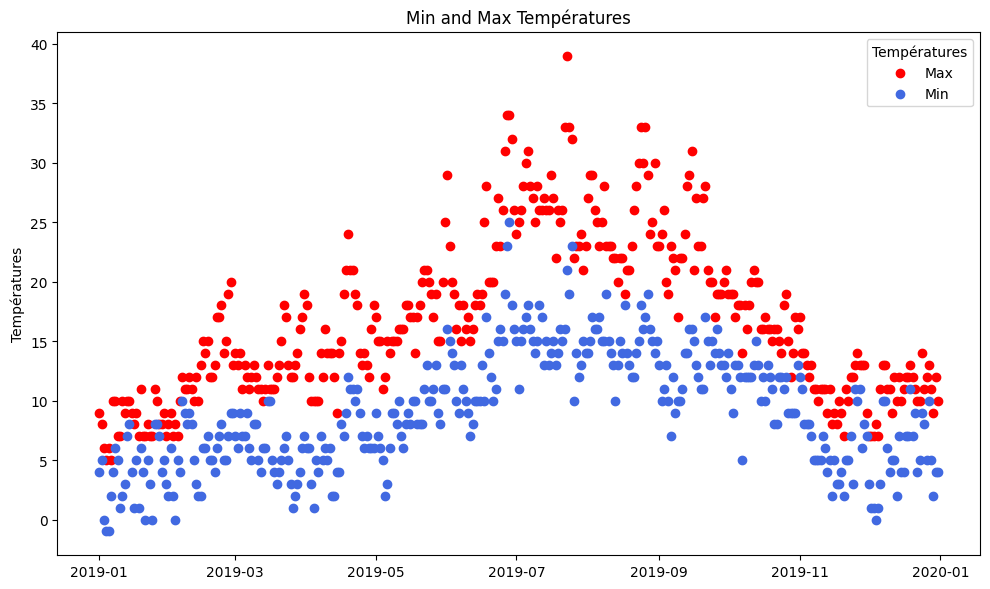

In [3]:
# Of course, you"ll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It"s up to you:
# Complete the code below :
plt.figure(figsize=(10, 6))

plt.scatter(
    x = df_weather["DATE"],
    y = df_weather["MAX_TEMPERATURE_C"],
    c= "red",
    label = "Max"
)
plt.scatter(
    x = df_weather["DATE"],
    y = df_weather["MIN_TEMPERATURE_C"],
    c= "royalblue",
    label = "Min"
)
plt.legend(loc = "upper right", title = "Températures")
plt.title(label = "Min and Max Températures")
plt.ylabel(ylabel="Températures")

plt.tight_layout()
plt.show()


## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

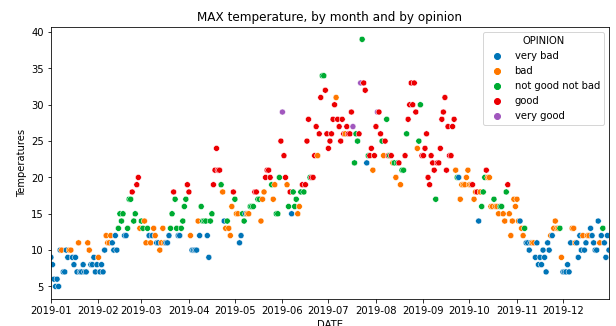

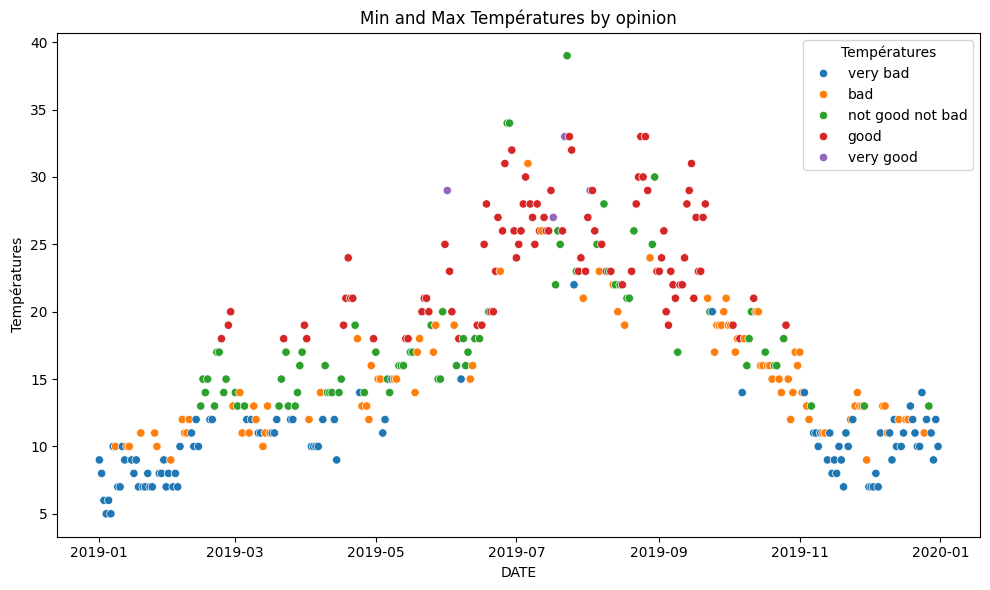

In [4]:
# Of course, you"ll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It"s up to you:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    df_weather,
    x="DATE",
    y="MAX_TEMPERATURE_C",
    hue="OPINION",
)
plt.legend(loc = "upper right", title = "Températures")
plt.title(label = "Min and Max Températures by opinion")
plt.ylabel(ylabel="Températures")

plt.tight_layout()
plt.show()


## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let"s modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it"s logical ?

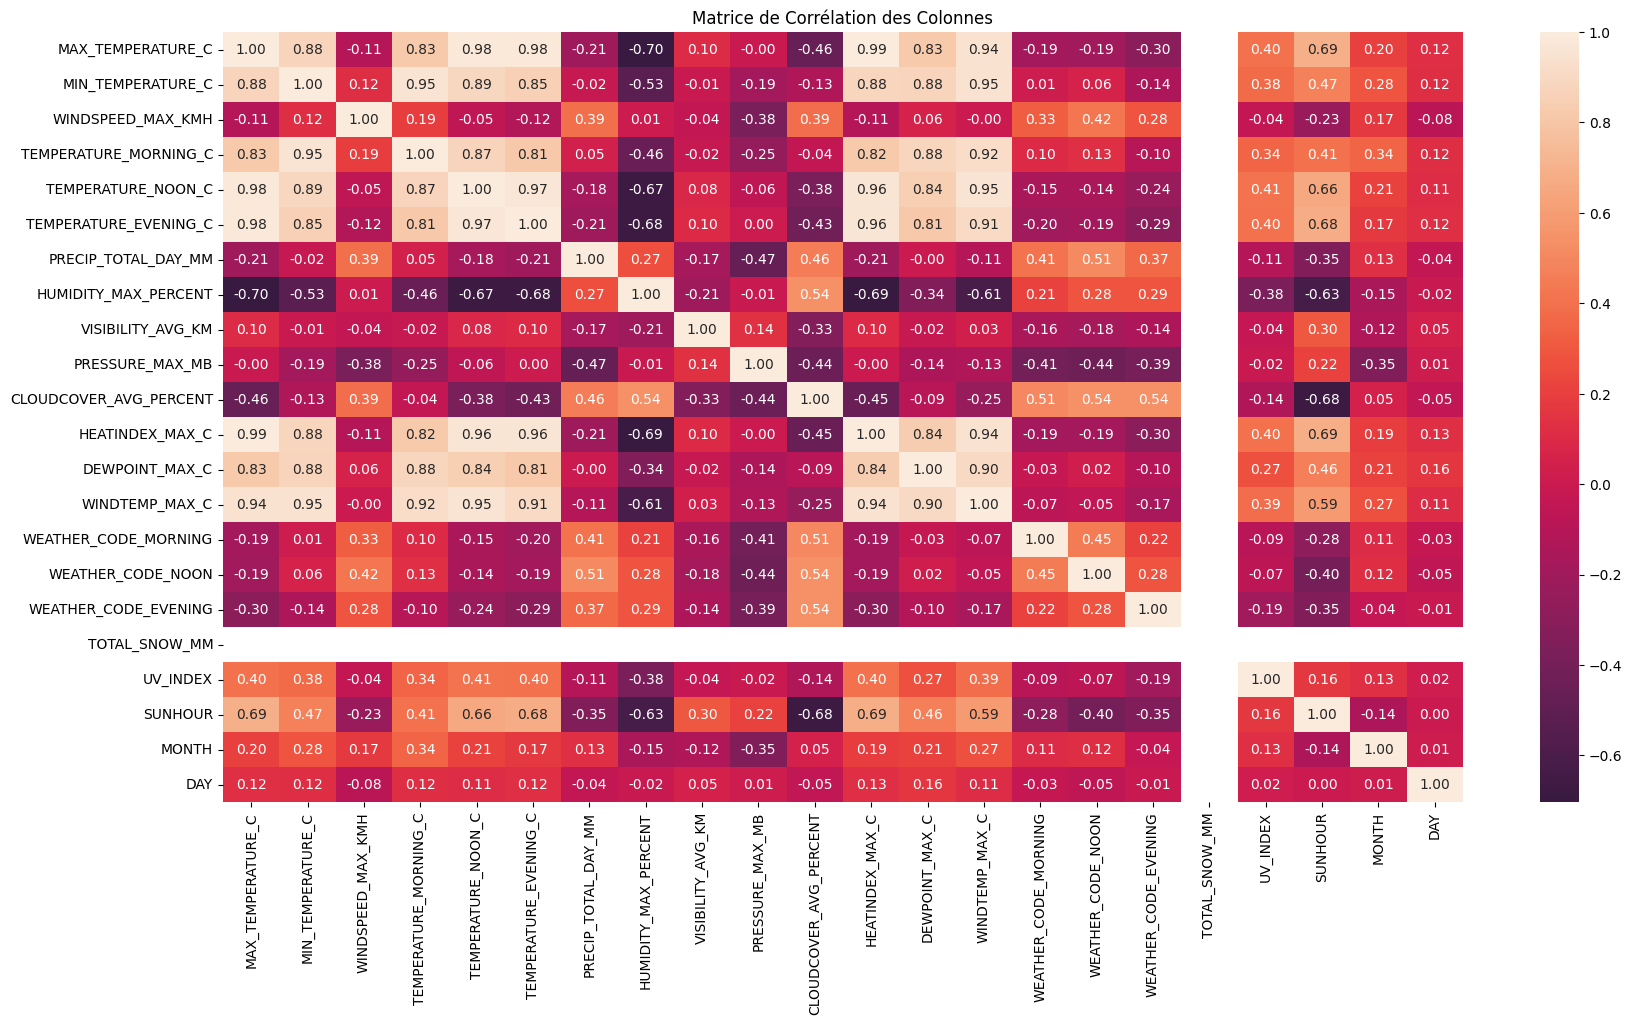

In [5]:
df_num = df_weather.select_dtypes(include=["float64", "int64"])

matrix = df_num.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(
    matrix,
    cmap="rocket",
    center=0,
    annot=True,
    fmt=".2f"
)

plt.title("Matrice de Corrélation des Colonnes")

# plt.tight_layout()
plt.show()


In [6]:
""" What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ? """
# La valeur diagonale est de 1 car une variable est toujours parfaitement corrélée avec elle-même.
# La colonne et la ligne blanches correspondent à la variable TOTAL_SNOW_MM, elle ne contient aucune valeur.


""" Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1. """
# Les colonnes les moins corrélées sont celles avec un coefficient de corrélation proche de 0. Par exemple, PRESSURE_MAX_MB avec une valeur de -0.00.

""" which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it"s logical ? """
# Positivement : HEATINDEX_MAX_C avec une corrélation de 0.99.
# Négativement : HUMIDITY_MAX_PERCENT avec une corrélation de -0.70.


' which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it"s logical ? '

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that"s a pairplot. But it"s slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

In [7]:
# # It"s your turn:
# selected_columns = df_weather.columns[1:10].tolist() + ["OPINION"]

# df_slice = df_weather[selected_columns]
# df_sample = df_slice.sample(50, random_state=24)

# sns.pairplot(df_sample, hue="OPINION")
# plt.suptitle("Pairplot coloré par OPINION")
# plt.show()


## Linear regression

With `regplot`, you can plot a regresion line. It"s very simple, but here, it"s not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

In [8]:

# sns.regplot("WINDSPEED_MAX_KMH", "MAX_TEMPERATURE_C", data = df_weather)
# plt.show()


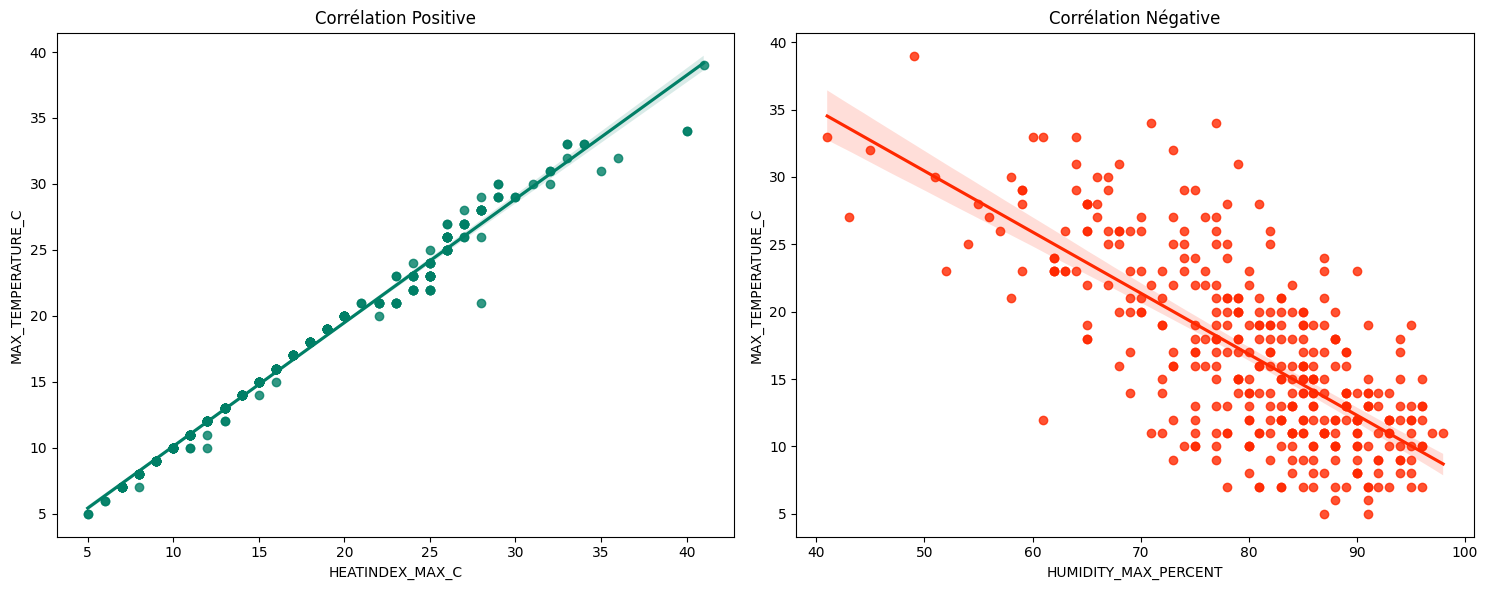

In [9]:
# Display a regplot with a positive correlation:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Positif :
sns.regplot(
    x="HEATINDEX_MAX_C",
    y="MAX_TEMPERATURE_C",
    data=df_weather,
    ax=axes[0],
    color="#007f66"
)
axes[0].set_title("Corrélation Positive")

# Négatif :
sns.regplot(
    x="HUMIDITY_MAX_PERCENT",
    y="MAX_TEMPERATURE_C",
    data=df_weather,
    ax=axes[1],
    color="#ff2800"
)
axes[1].set_title("Corrélation Négative")

plt.tight_layout()
plt.show()


In [10]:
# Display a regplot with a negative correlation:


# More and more...
Draw 4 different charts of your choice on the same dashboard. You"re an analyst, you have to be force of proposal. Your goal here is to represent which season has the best weather.

Remember, a MatPlotLib "figure" is like a dashboard including subplots. So you have to create a MatPlotLib figure with subplots. And these subplots will be Seaborn"s charts.

In [13]:
df_weather.dropna(subset=["MAX_TEMPERATURE_C", "SUNHOUR", "WINDSPEED_MAX_KMH", "PRECIP_TOTAL_DAY_MM"], inplace=True)


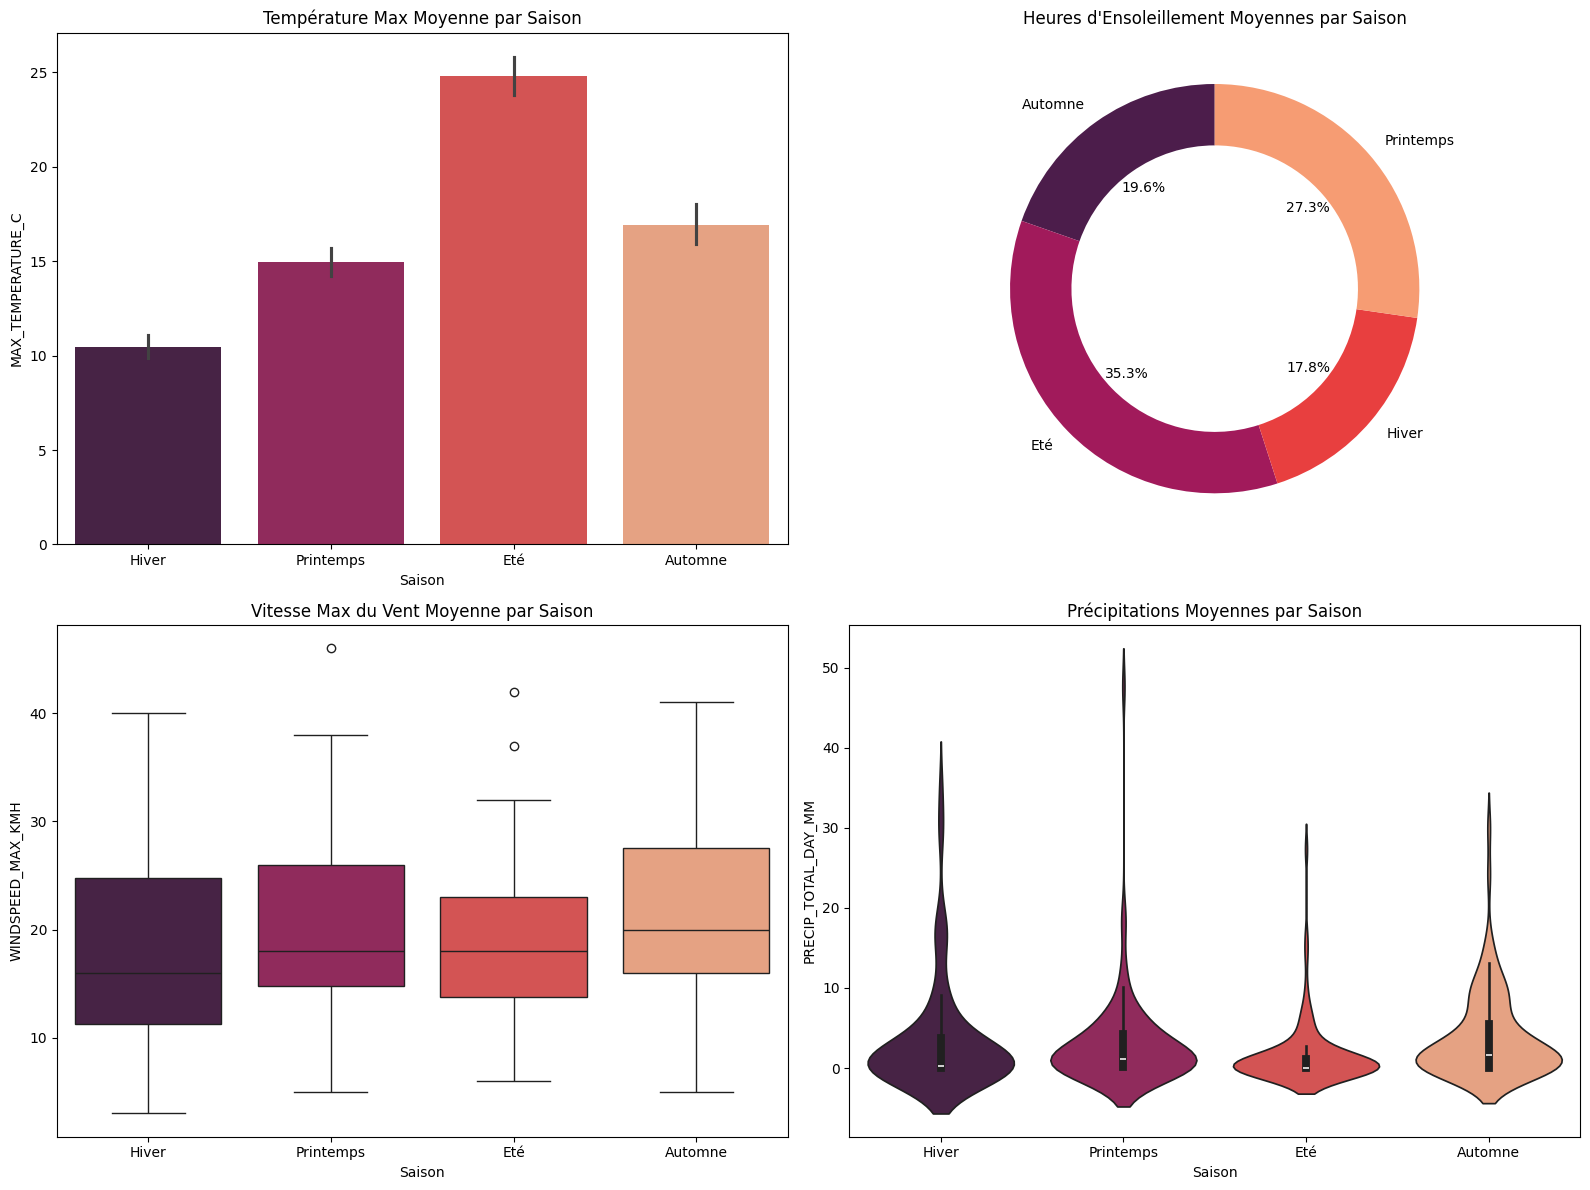

In [32]:
# Your code here
def saisons(month):
    if month in [12, 1, 2]:
        return "Hiver"
    elif month in [3, 4, 5]:
        return "Printemps"
    elif month in [6, 7, 8]:
        return "Eté"
    else:
        return "Automne"

df_weather["Saison"] = df_weather["MONTH"].apply(saisons)
palette = "rocket"

pie_mean = df_weather.groupby("Saison").agg({
    "SUNHOUR": "mean",
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(
    x="Saison",
    y="MAX_TEMPERATURE_C",
    data=df_weather,
    ax=axes[0, 0],
    hue="Saison",
    palette=palette,
)
axes[0, 0].set_title("Température Max Moyenne par Saison")

axes[0, 1].pie(
    pie_mean["SUNHOUR"],
    labels=pie_mean["Saison"],
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette(palette, n_colors=4),
    wedgeprops=dict(width=0.3)
)
axes[0, 1].set_title("Heures d'Ensoleillement Moyennes par Saison")

sns.boxplot(
    x="Saison",
    y="WINDSPEED_MAX_KMH",
    data=df_weather,
    ax=axes[1, 0],
    hue="Saison",
    palette=palette
)
axes[1, 0].set_title("Vitesse Max du Vent Moyenne par Saison")

sns.violinplot(
    x="Saison",
    y="PRECIP_TOTAL_DAY_MM",
    data=df_weather,
    ax=axes[1, 1],
    hue="Saison",
    palette=palette
)
axes[1, 1].set_title("Précipitations Moyennes par Saison")

plt.tight_layout()
plt.show()


# Is it summer? It seems appropriate. :)